In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import base64
from multiprocessing.managers import BaseManager
import io
from matplotlib import animation
import folium
import folium.plugins

In [4]:
warnings.filterwarnings("ignore")

In [28]:
terror_data = pd.read_excel(r"D:\GitHub\World_Terrorism_Analysis\gtd_data.xlsx")
terror_data1 = pd.read_csv(r"D:\GitHub\World_Terrorism_Analysis\gtd_data.csv",encoding="ISO-8859-1") 

terror_data1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'attacktype1_txt':'AttackType', 'nkill':'Death', 'nwound':'Injured', 'gname':'Attacker','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType', 'weapsubtype1_txt':'WeaponSubType', 'weapdetail':'WeaponDetail'},inplace=True)



<h1>Exploratory Data Analysis</h1>

In [30]:
#terror_data.head()

terror_data1.head()

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   
2  197001000001  1970      1    0        NaN         0        NaN      160   
3  197001000002  1970      1    0        NaN         0        NaN       78   
4  197001000003  1970      1    0        NaN         0        NaN      101   

              Country  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
terror_data.shape

(181690, 15)

In [ ]:
terror_data.describe()

Day          Month           Year          Death
count  181686.000000  181686.000000  181686.000000  135539.000000
mean       15.505955       6.467389    2002.639675       2.185806
std         8.813856       3.388238      13.258717      10.723854
min         0.000000       0.000000    1970.000000       0.000000
25%         8.000000       4.000000    1991.000000       0.000000
50%        15.000000       6.000000    2009.000000       0.000000
75%        23.000000       9.000000    2014.000000       2.000000
max        31.000000      12.000000    2017.000000    1570.000000

In [ ]:
terror_data.isnull().sum()

Day                    4
Month                  4
Year                   4
Date                   4
Country                4
City                 438
Latitude            4556
Longitude           4557
Attacker           30341
Death              46151
Attack Type        30120
Target Type        30120
Weapon Type        35238
Weapon Sub Type    51383
Weapon Detail      81395
dtype: int64

<h2>Basic Analysis</h2>

In [ ]:
print("Known Count of Deaths in Terrorist Attacks:", terror_data["Death"].value_counts()[0], "\n")

print("Country With The Highest Terrorist Attacks:", terror_data["Country"].value_counts().index[0], "\n")

print("Most deaths in an attack:\n",terror_data.loc[terror_data['Death'].idxmax()], "\n")

Known Count of Deaths in Terrorist Attacks: 70891 

Country With The Highest Terrorist Attacks: Iraq 

Most deaths in an attack:
 Day                                                       12.0
Month                                                      6.0
Year                                                    2014.0
Date                                                 12/6/2014
Country                                                   Iraq
City                                                    Tikrit
Latitude                                              33303566
Longitude                                             44371773
Attacker           Islamic State of Iraq and the Levant (ISIL)
Death                                                   1570.0
Attack Type                        Hostage Taking (Kidnapping)
Target Type                                           Military
Weapon Type                                           Firearms
Weapon Sub Type                               Unkno

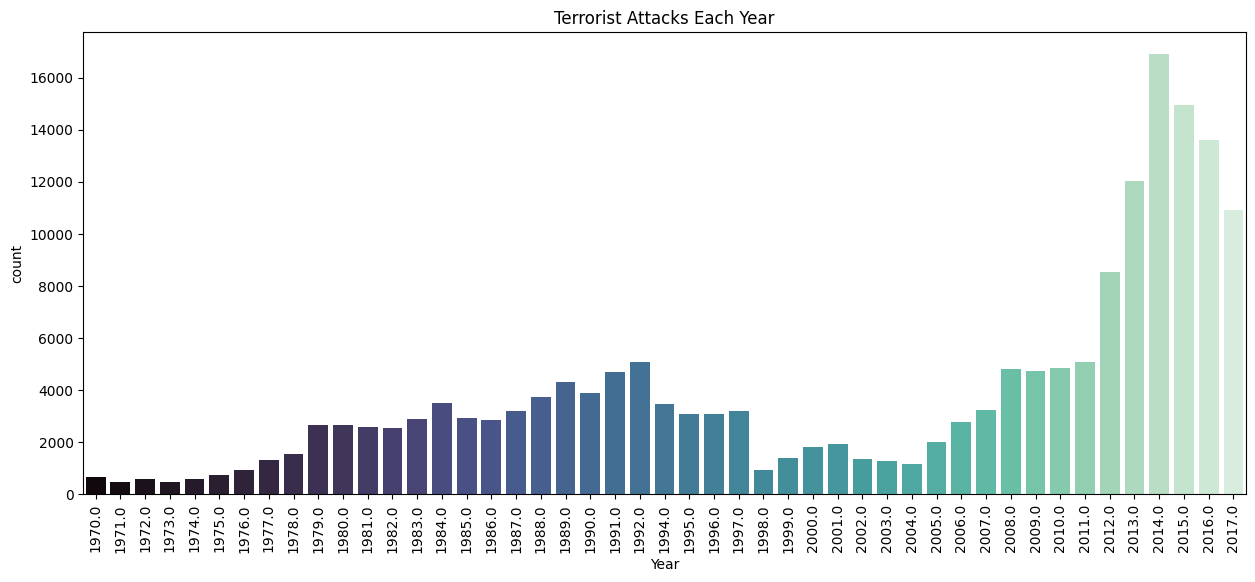

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(data=terror_data, x="Year", palette="mako")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Year')
plt.show()

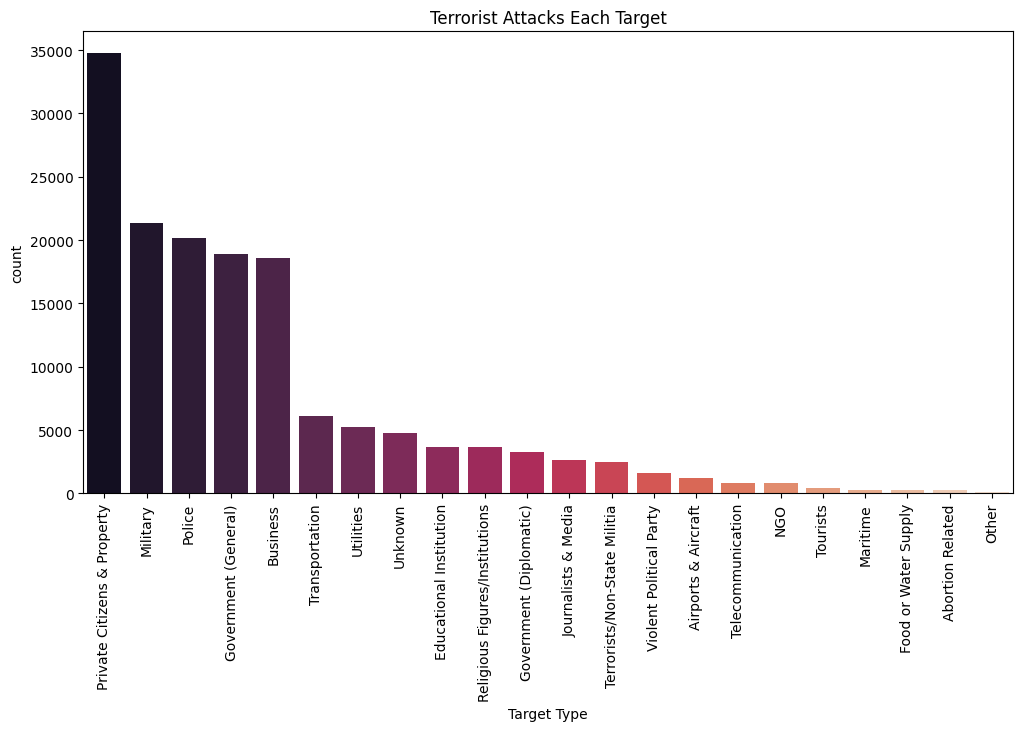

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(data=terror_data, x="Target Type", order=terror_data["Target Type"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Target')
plt.show()

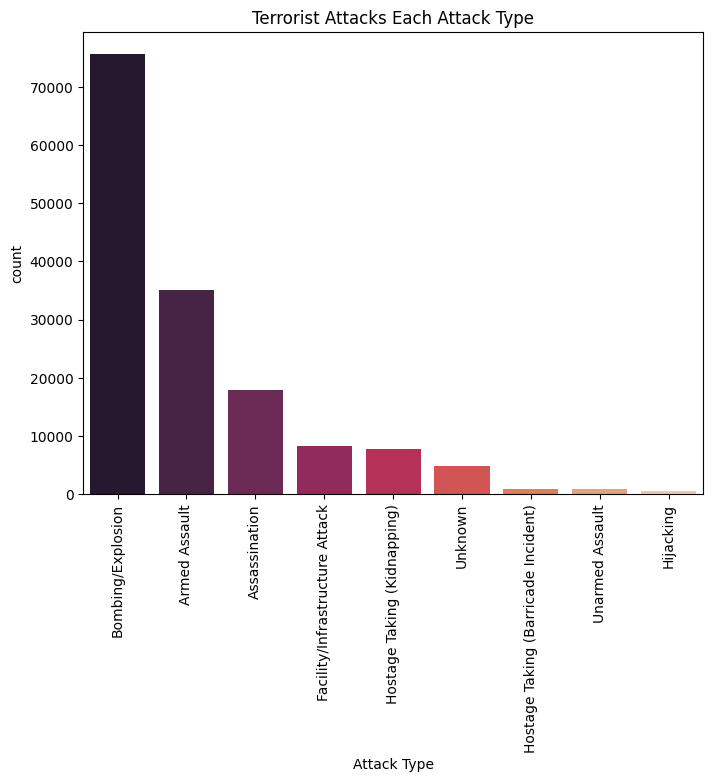

In [ ]:
plt.subplots(figsize=(8,6))
sns.countplot(data=terror_data, x="Attack Type", order=terror_data["Attack Type"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Attack Type')
plt.show()

In [55]:
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color  
    
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   

terror_turkey=terror_data1[terror_data1["Country"]=="Turkey"]
terror_turkey_fol=terror_turkey.copy()
terror_turkey_fol.dropna(subset=["Latitude","Longitude"],inplace=True)
location_tr=terror_turkey_fol[["Latitude","Longitude"]][:5000]
city_tr=terror_turkey_fol["City"][:5000]
Death_tr=terror_turkey_fol["Death"][:5000]
Injured_tr=terror_turkey_fol["Injured"][:5000]
target_tr=terror_turkey_fol["TargetType"][:5000]

map4 = folium.Map(location=[38.9637, 35.2433],tiles='CartoDB dark_matter',zoom_start=6)
for point in location_tr.index:
    folium.CircleMarker(list(location_tr.loc[point].values),popup='<b>City: </b>'+str(city_tr[point])+'<br><b>Killed: </b>'+str(Death_tr[point])+'<br><b>Injured: </b>'+str(Injured_tr[point])+'<br><b>Target: </b>'+str(target_tr[point]),radius=point_size(Death_tr[point]),color=color_point(Death_tr[point]),fill_color=color_point(Death_tr[point])).add_to(map4)
map4



MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000021F4DCFFAC0> (for post_execute):


TypeError: BaseManager.__init__() got an unexpected keyword argument 'projection'

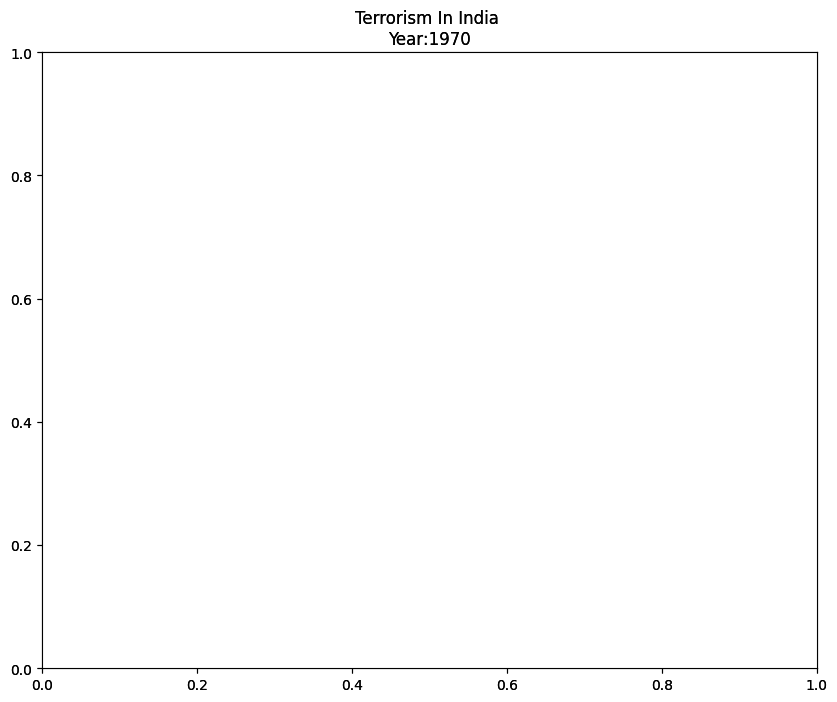

In [41]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In India '+'\n'+'Year:' +str(Year))
    m5 = BaseManager(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
    lat_gif=list(terror_turkey[terror_turkey['Year']==Year].Latitude)
    long_gif=list(terror_turkey[terror_turkey['Year']==Year].Longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[Death for Death in zip(terror_turkey[terror_turkey['Year']==Year].Death,terror_turkey[terror_turkey['Year']==Year])],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_turkey.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))